In [1]:
import os
import sys

import pandas as pd
sys.path.append(os.path.abspath("../common"))  # add path to common functions
from preprocess import getdfs, get_char_columns
from preprocess import one_hot_encode

In [2]:
train_df, valid_df = getdfs("emoticon")

In [3]:
from preprocess import find_common_characters, remove_common_characters

In [4]:
strings = train_df['input_emoticon'].values
common_chars = find_common_characters(strings)

print("Common characters:", common_chars)

strings_after_removal = remove_common_characters(strings)
print("Strings after removal of common characters:", strings_after_removal)

Common characters: {'🙯', '😣', '🛐', '😛', '😑', '🙼', '🚼'}
Strings after removal of common characters: ['😻🙠😒', '😪🚅😹', '🚡🙲🛑', '🙐🙪🛆', '🚟🙋😹', '🚧🚜🙕', '🚥😬🚄', '🚡🚔🛓', '🛜😚🚠', '🙷😍😿', '🙚😍😸', '😯😻😹', '🙒🚙😬', '😿🚴😴', '🚂😦🙨', '🛝😉🙒', '😵🚃🚜', '🛆😘😊', '🚟😌😿', '🙧😉🚍', '🛓🚥😢', '🚵😊😩', '😬😠🛡', '🚜😰🚏', '🚗🙸🚌', '😓🚲😆', '🛌😺🙍', '😳🚦🙍', '🚏😏🙏', '😆😰🚯', '🙊😳😻', '😤🙍🙀', '😻🛔🚷', '🛈🛋\U0001f6db', '🚊🙸🛀', '🚒🙟😓', '😧🚰🙬', '🚳🛏😓', '🛍😨🛆', '🙬😗🙐', '🙈😱🙒', '🚄🚆🛖', '\U0001f6d8🙔🙏', '🚱🙊🛖', '🚮🛀🛀', '🙁🙽🛖', '🚵🚾🚣', '🚣🙇🚰', '😎🙏🚃', '🚿🚎🚯', '🙄🛎😁', '🙚😻🙅', '🚕🚯😓', '🙊😎😸', '😘🙍🙬', '😧🚰🙫', '🙷🙀😮', '🙳🙩🙟', '🚁🙦🛆', '🚴😊🙏', '😼😆🛄', '🛡🙳🙒', '😋😖🙕', '🙽😞🙩', '🚊🙐\U0001f6db', '🙙🚡🚄', '😿🙲🛇', '🚜🙤😶', '🛉🙨😒', '😯😚🚣', '🙾🚍🙅', '🚾🚀😓', '🚅\U0001f6db🙟', '😿😲🙏', '🚓🛌🙅', '🚍🚓😹', '😬🙶🛍', '🚦🛒\U0001f6db', '🚑😚🙩', '🚂🙎😊', '😧😚🛂', '🙫🚭🛍', '😚🙷😿', '😍🙈🚷', '🚀😊🛖', '😉😖😁', '😆🙑😋', '🛍😤🚾', '🙙😶🙩', '🛔🚄🛏', '🚚🛌🙩', '😚🛉🚿', '😳🙕😩', '🚍🚛😪', '🙄🙱🛓', '🙑🙨😕', '🛄🙗🚇', '😺🚿🙅', '😼🚰🛆', '😸🚧🛅', '🚑😶🚣', '🚽🛎\U0001f6db', '🙾🚏😕', '🛄🚩🚁', '😠😦😅', '🛈🙏🛓', '🚣🙜🛡', '🙹😦🛓', '🚶🚦😴', '🛌🚗😆', '😚😤😴', '😏🙬😋', '🙘🚇🚷', '🙒😷🛟', '😰😉🙕', '😾🛌😥', '🙳\U0001f6d8🚰', '😔🛜🛖', '🛎😊😻', '🙍🚲😸

In [5]:
# Create one-hot encoding of the dataset

train_df['input_emoticon'] = strings_after_removal
valid_df['input_emoticon'] = remove_common_characters(valid_df['input_emoticon'].values)


In [6]:
train_df.head()

,input_emoticon,label
0,😻🙠😒,0
1,😪🚅😹,0
2,🚡🙲🛑,0
3,🙐🙪🛆,1
4,🚟🙋😹,1


In [7]:
train_df = get_char_columns(train_df)
valid_df = get_char_columns(valid_df)

In [8]:
train_df.head()

,c_1,c_2,c_3,label
0,😻,🙠,😒,0
1,😪,🚅,😹,0
2,🚡,🙲,🛑,0
3,🙐,🙪,🛆,1
4,🚟,🙋,😹,1


In [9]:
x_train, x_valid, y_train, y_valid = one_hot_encode(train_df, valid_df)

(7080, 501) (489, 501)


In [10]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions

Number of parameters in the MLP model:  8049
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.98      0.96      0.97       252
     Class 1       0.95      0.97      0.96       237

    accuracy                           0.97       489
   macro avg       0.97      0.97      0.97       489
weighted avg       0.97      0.97      0.97       489

Accuracy is 0.9652351738241309
==========MLP==========


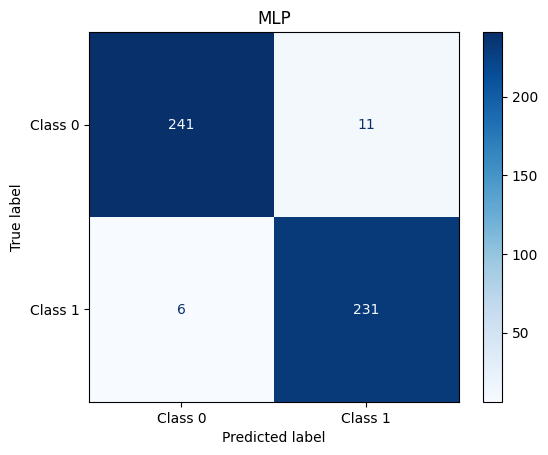

In [11]:
y_pred_mlp = predict_mlp(x_train, y_train, x_valid, hidden_layer_sizes=(16,), max_iter=1000)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP')

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.92      0.91      0.92       252
     Class 1       0.91      0.92      0.91       237

    accuracy                           0.92       489
   macro avg       0.92      0.92      0.92       489
weighted avg       0.92      0.92      0.92       489

Accuracy is 0.9161554192229039
==========Random Forest==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:48:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.90      0.95      0.93       252
     Class 1       0.95      0.89      0.92       237

    accuracy                           0.92       489
   macro avg       0.92      0.92      0.92       489
weighted avg       0.92      0.92      0.92       489

Accuracy is 0.9222903885480572
==========XGBoost==========
==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.96      0.94      0.95       252
     Class 1       0.94      0.96      0.95       237

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489

Accuracy is 0.9488752556237219
==========Logistic Regression==========
Number of parameters in the MLP model:  55301
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.97

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


==========SVC==========
              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93       252
     Class 1       0.93      0.92      0.92       237

    accuracy                           0.93       489
   macro avg       0.93      0.93      0.93       489
weighted avg       0.93      0.93      0.93       489

Accuracy is 0.9263803680981595
==========SVC==========


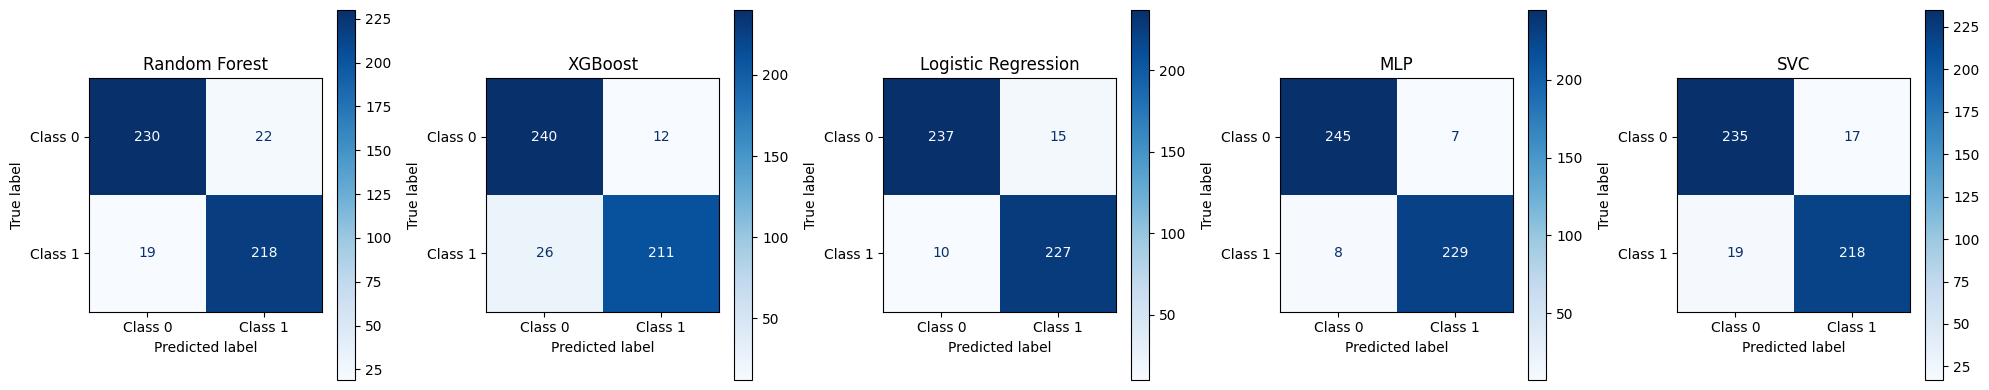

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()

## For lesser datasize 

In [16]:
from models import predict_xgboost, predict_mlp, predict_logistic_regression, predict_random_forest, predict_svc

In [17]:
from sklearn.metrics import accuracy_score

model_columns = ['Random Forest', 'XGBoost', 'Logistic Regression', 'MLP', 'SVC']
size_colums = ['0.2', '0.4', '0.6', '0.8', '1.0']

In [18]:
results_df = pd.DataFrame(columns=model_columns, index=size_colums)

for size in [1.0, 0.8, 0.6, 0.4, 0.2]:
    curr_train_df = train_df.copy().iloc[:int(size * len(train_df))]
    curr_valid_df = valid_df.copy().iloc[:int(size * len(valid_df))]
    
    x_train, x_valid, y_train, y_valid = one_hot_encode(curr_train_df, curr_valid_df)

    y_pred_rf = predict_random_forest(x_train, y_train, x_valid)

    y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)

    y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)

    y_pred_mlp = predict_mlp(x_train, y_train, x_valid, hidden_layer_sizes=(16,), max_iter=1000)

    y_pred_svc = predict_svc(x_train, y_train, x_valid, max_iter = 10000)
    
    results_df.loc[str(size), 'Random Forest'] = accuracy_score(y_valid, y_pred_rf)
    results_df.loc[str(size), 'XGBoost'] = accuracy_score(y_valid, y_pred_xgb)
    results_df.loc[str(size), 'Logistic Regression'] = accuracy_score(y_valid, y_pred_lr)
    results_df.loc[str(size), 'MLP'] = accuracy_score(y_valid, y_pred_mlp)
    results_df.loc[str(size), 'SVC'] = accuracy_score(y_valid, y_pred_svc)
    

(7080, 501) (489, 501)


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:51:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Number of parameters in the MLP model:  8049
(5664, 501) (391, 501)


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:51:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Number of parameters in the MLP model:  8049
(4248, 501) (293, 501)


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:52:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Number of parameters in the MLP model:  8049
(2832, 501) (195, 501)


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:52:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Number of parameters in the MLP model:  8049
(1416, 501) (97, 501)


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:52:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Number of parameters in the MLP model:  8049


In [19]:
print(results_df)

    Random Forest   XGBoost Logistic Regression       MLP       SVC
0.2      0.876289  0.876289            0.917526  0.907216  0.886598
0.4      0.933333  0.923077             0.94359  0.933333  0.923077
0.6      0.928328  0.914676            0.952218  0.955631   0.90785
0.8      0.913043  0.907928            0.953964  0.966752  0.918159
1.0      0.916155   0.92229            0.948875  0.965235  0.940695


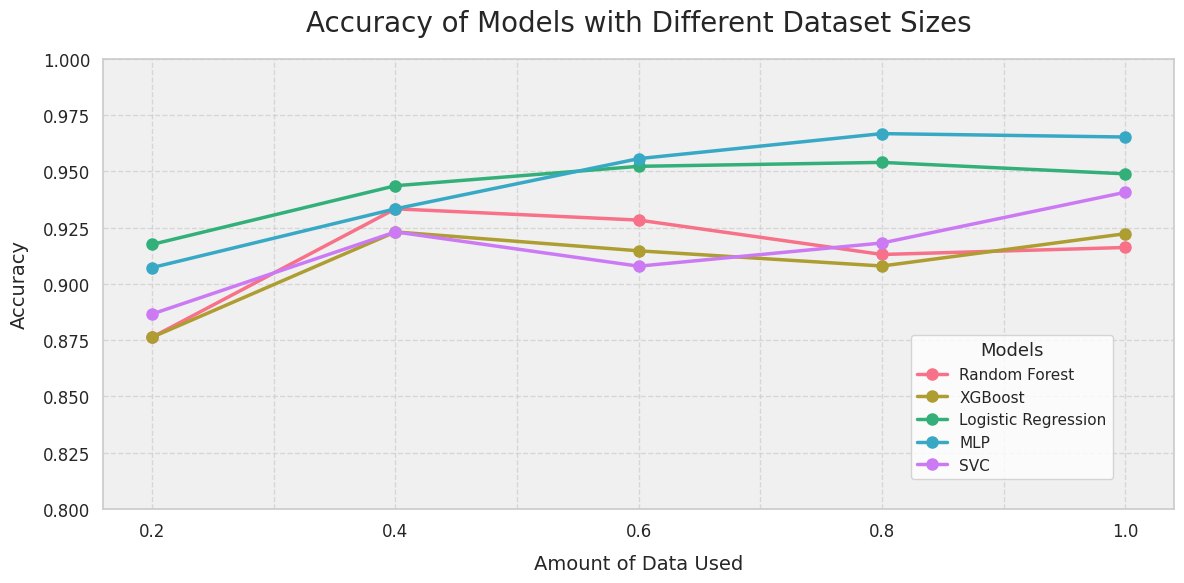

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data with a color palette
colors = sns.color_palette("husl", n_colors=len(results_df.columns))
results_df.plot(ax=ax, linewidth=2.5, marker='o', markersize=8, color=colors)

# Customize the plot
plt.ylim(0.8, 1)
plt.title('Accuracy of Models with Different Dataset Sizes', fontsize=20, pad=20)
plt.xlabel('Amount of Data Used', fontsize=14, labelpad=10)
plt.ylabel('Accuracy', fontsize=14, labelpad=10)

# Customize the grid
ax.grid(True, linestyle='--', alpha=0.7)

# Customize the legend
ax.legend(title='Models', title_fontsize='13', fontsize='11', loc='lower right', bbox_to_anchor=(0.95, 0.05))

# Customize the tick labels
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a subtle background color
ax.set_facecolor('#f0f0f0')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Plot for MLP

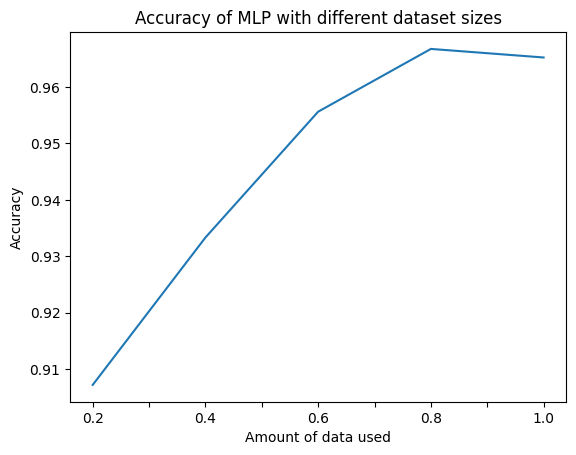

In [21]:
results_df.MLP.plot()
plt.title('Accuracy of MLP with different dataset sizes')
plt.xlabel('Amount of data used')
plt.ylabel('Accuracy')

plt.show()